In [1]:
# Cell 1: Import necessary libraries and read data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Read data
csv_path = "Data/week_consumption.csv"
data = pd.read_csv(csv_path, parse_dates=["Date"], thousands=',')
data = data.sort_values(by="Date")

In [3]:
# Calculate charger totals
chargers_total = data[["Chargers (L1) [kW]", "Chargers (L2) [kW]", "Chargers (L3) [kW]"]].sum(axis=1)
chargers_achteraan_total = data[["Chargers achteraan (L1) [kW]", "Chargers achteraan (L2) [kW]", "Chargers achteraan (L3) [kW]"]].sum(axis=1)
data["Total Chargers Combined"] = chargers_total + chargers_achteraan_total


In [4]:
# Cell 2: Display basic statistics
print("Basic Statistics of the Dataset:")
print(data.describe())

Basic Statistics of the Dataset:
                      Date  Grid Organi lbc (L1) [kW]  \
count                  672                 672.000000   
mean   2025-02-06 11:52:30                9908.892857   
min    2025-02-03 00:00:00                  10.000000   
25%    2025-02-04 17:56:15                5610.750000   
50%    2025-02-06 11:52:30                6339.000000   
75%    2025-02-08 05:48:45                9354.250000   
max    2025-02-09 23:45:00               55246.000000   
std                    NaN               10165.767065   

       Grid Organi lbc (L2) [kW]  Grid Organi lbc (L3) [kW]  \
count                 672.000000                 672.000000   
mean                 8029.680060                8373.659226   
min                   -83.000000                   5.000000   
25%                  4101.750000                4835.500000   
50%                  4268.500000                4979.000000   
75%                  7083.750000                7005.750000   
max         

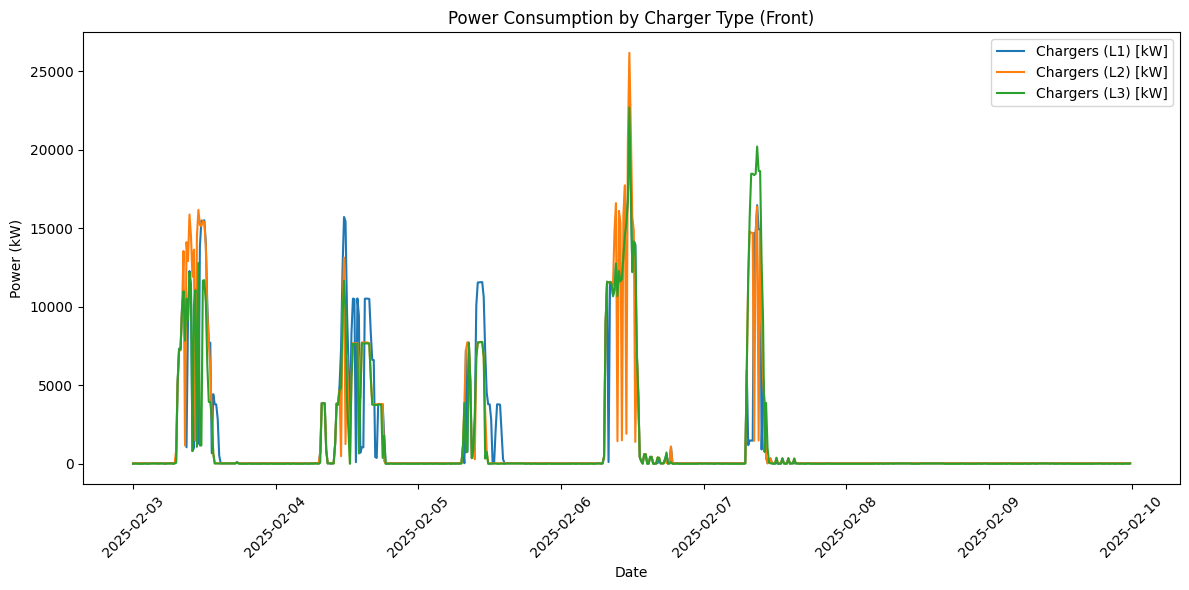

In [5]:
# Cell 3: Line plot with individual charger types
plt.figure(figsize=(12, 6))
for col in ["Chargers (L1) [kW]", "Chargers (L2) [kW]", "Chargers (L3) [kW]"]:
    plt.plot(data["Date"], data[col], label=col)
plt.title("Power Consumption by Charger Type (Front)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

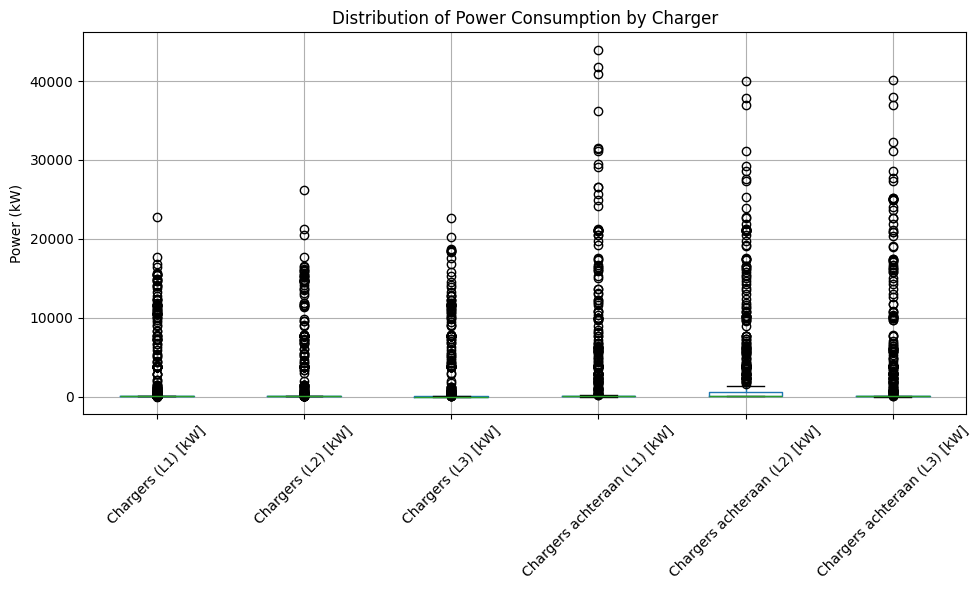

In [6]:
# Cell 4: Box plot of power consumption
plt.figure(figsize=(10, 6))
charger_cols = ["Chargers (L1) [kW]", "Chargers (L2) [kW]", "Chargers (L3) [kW]",
                "Chargers achteraan (L1) [kW]", "Chargers achteraan (L2) [kW]", "Chargers achteraan (L3) [kW]"]
data[charger_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Distribution of Power Consumption by Charger")
plt.ylabel("Power (kW)")
plt.tight_layout()
plt.show()

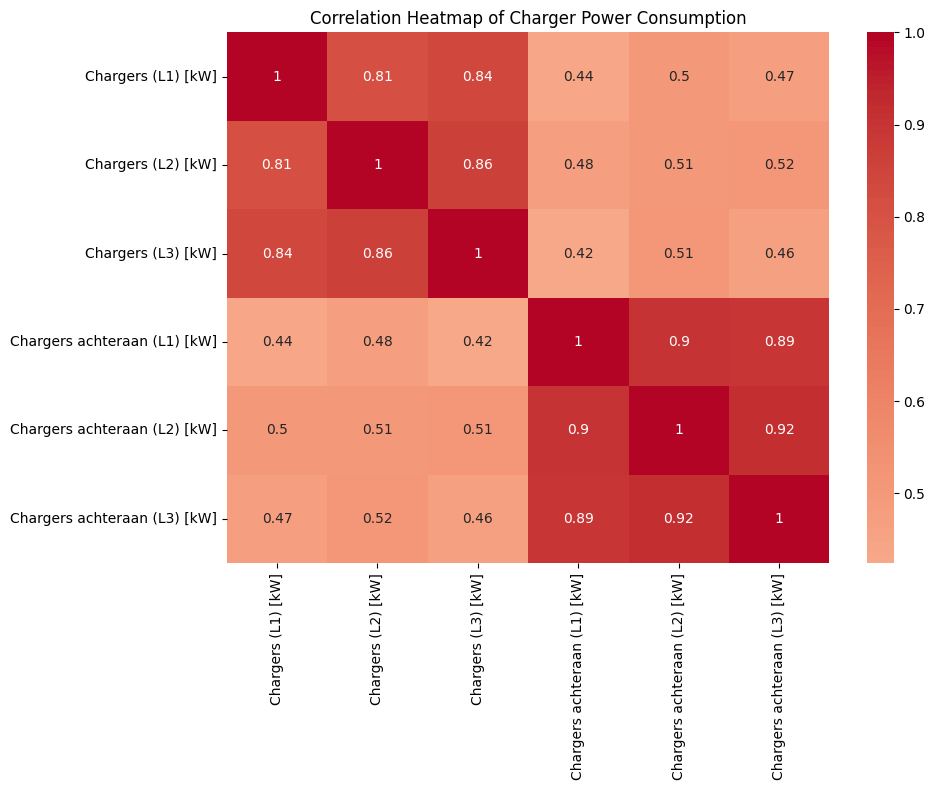

In [7]:
# Cell 5: Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = data[charger_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Charger Power Consumption")
plt.tight_layout()
plt.show()

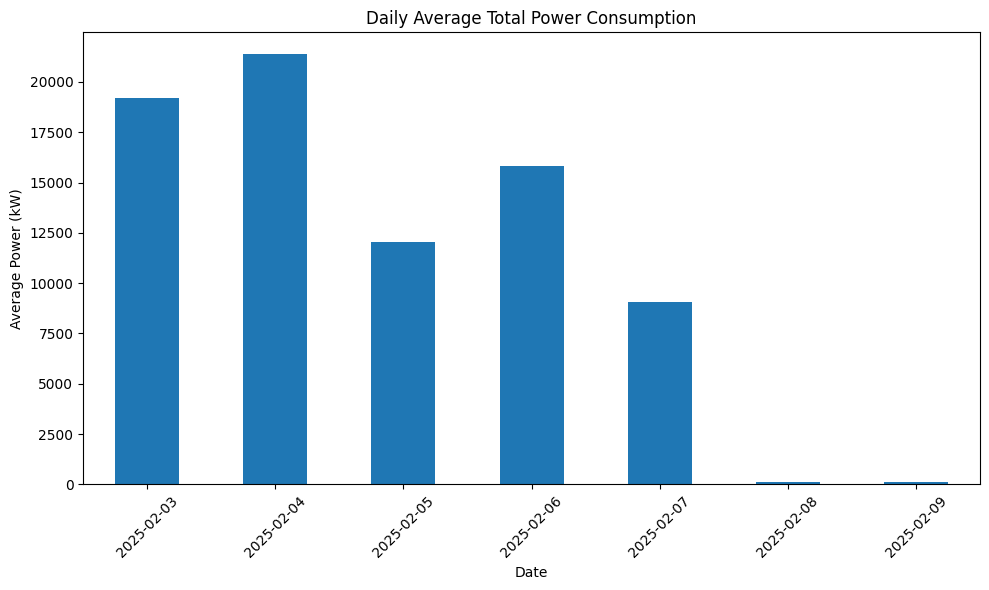

In [8]:
# Cell 6: Daily average consumption
daily_avg = data.groupby(data['Date'].dt.date)['Total Chargers Combined'].mean()
plt.figure(figsize=(10, 6))
daily_avg.plot(kind='bar')
plt.title("Daily Average Total Power Consumption")
plt.xlabel("Date")
plt.ylabel("Average Power (kW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

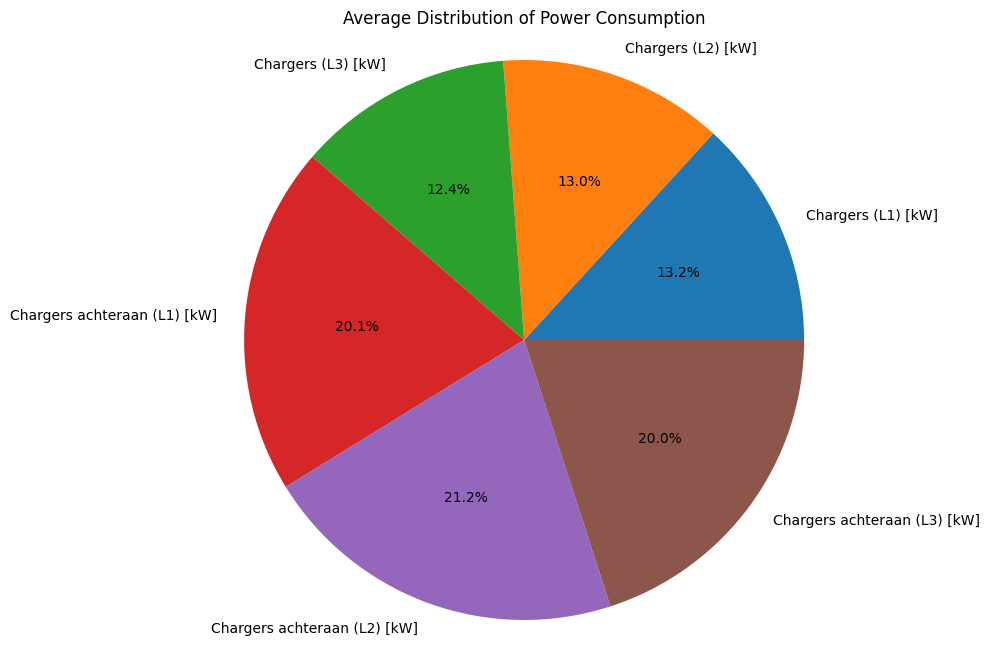

In [9]:
# Cell 7: Pie chart of average consumption distribution
avg_consumption = data[charger_cols].mean()
plt.figure(figsize=(10, 8))
plt.pie(avg_consumption, labels=avg_consumption.index, autopct='%1.1f%%')
plt.title("Average Distribution of Power Consumption")
plt.axis('equal')
plt.show()

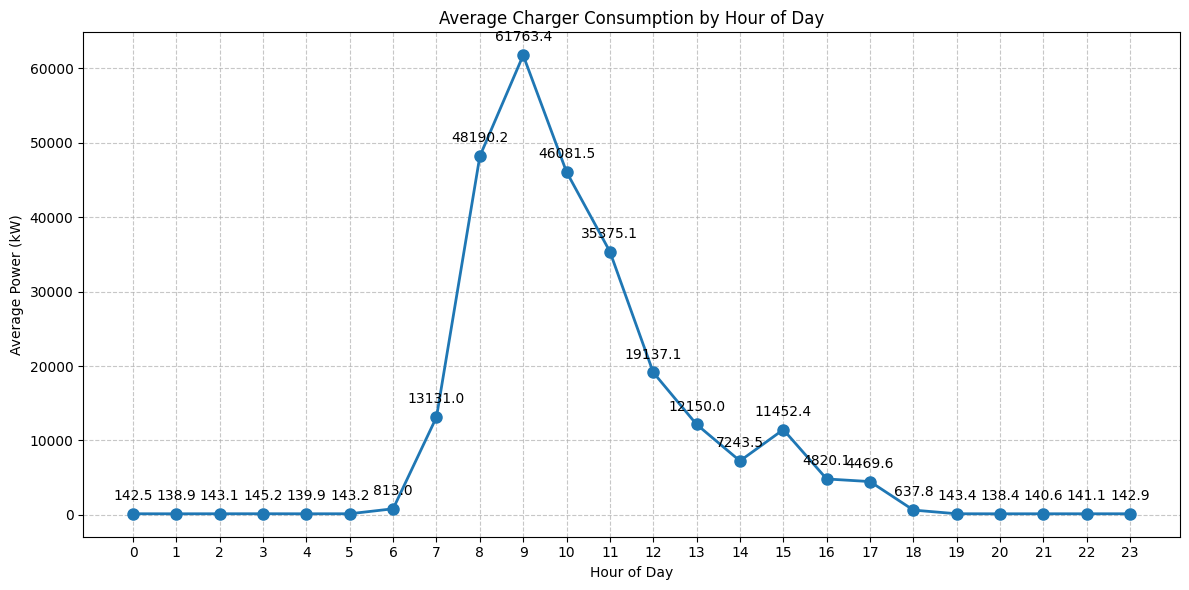


Hourly Average Consumption:
Date
0       142.50
1       138.93
2       143.07
3       145.21
4       139.86
5       143.18
6       813.04
7     13131.00
8     48190.25
9     61763.36
10    46081.54
11    35375.11
12    19137.14
13    12149.96
14     7243.46
15    11452.43
16     4820.14
17     4469.57
18      637.75
19      143.39
20      138.43
21      140.61
22      141.07
23      142.86
Name: Total Chargers Combined, dtype: float64


In [10]:
# Calculate hourly average of combined charger consumption
hourly_avg = data.groupby(data['Date'].dt.hour)['Total Chargers Combined'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=8)
plt.title('Average Charger Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power (kW)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))

# Add value labels on the points
for x, y in zip(hourly_avg.index, hourly_avg.values):
    plt.annotate(f'{y:.1f}', 
                (x, y), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.tight_layout()
plt.show()

# Print the numerical values
print("\nHourly Average Consumption:")
print(hourly_avg.round(2))

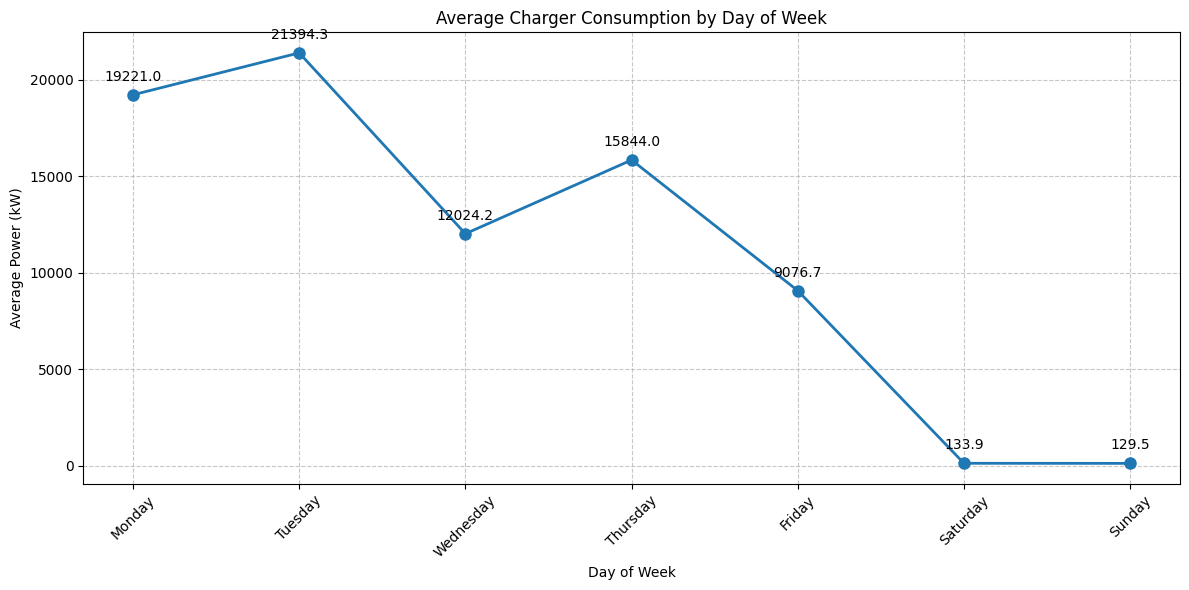


Daily Average Consumption:
Day_of_Week
Monday       19220.99
Tuesday      21394.26
Wednesday    12024.25
Thursday     15843.98
Friday        9076.74
Saturday       133.91
Sunday         129.50
Name: Total Chargers Combined, dtype: float64


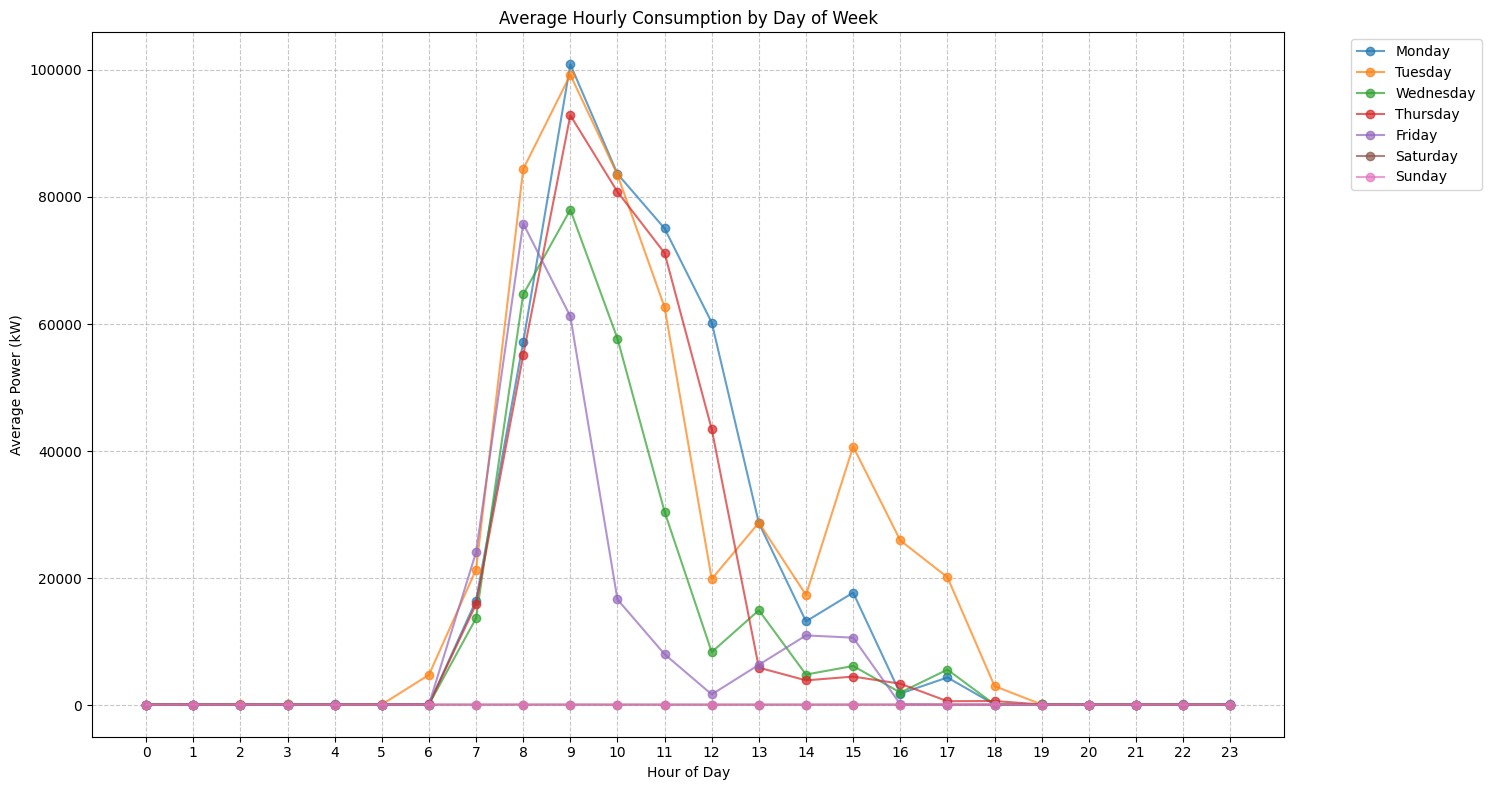

In [11]:
# Add day of week column and calculate average consumption by day
data['Day_of_Week'] = data['Date'].dt.day_name()
# Ensure days are in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = data.groupby('Day_of_Week')['Total Chargers Combined'].mean()
daily_avg = daily_avg.reindex(day_order)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg.values, marker='o', linewidth=2, markersize=8)
plt.title('Average Charger Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Power (kW)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on the points
for x, y in enumerate(daily_avg.values):
    plt.annotate(f'{y:.1f}', 
                (x, y), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.xticks(range(len(day_order)), day_order, rotation=45)
plt.tight_layout()
plt.show()

# Print the numerical values
print("\nDaily Average Consumption:")
print(daily_avg.round(2))

# Additional analysis: Show hourly patterns for each day of week
plt.figure(figsize=(15, 8))
for day in day_order:
    day_data = data[data['Day_of_Week'] == day]
    hourly_avg = day_data.groupby(day_data['Date'].dt.hour)['Total Chargers Combined'].mean()
    plt.plot(hourly_avg.index, hourly_avg.values, marker='o', label=day, alpha=0.7)

plt.title('Average Hourly Consumption by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power (kW)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()